### STOCK PRICE PREDICTION AND FORECASTING 

In [1]:
#DATA COLLECTION
import pandas_datareader as pdr

In [2]:
key='55097ab98d00c08518e37a7f39666c9f7a30c740'

In [3]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

C:\Users\SHUBHAM\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-02-06 00:00:00+00:00,163.03,163.72,154.00,154.83,66625484,38.705576,38.869391,36.561729,36.758782,266501936,0.00,1.0
1,AAPL,2018-02-07 00:00:00+00:00,159.54,163.40,159.07,163.09,50852130,37.877001,38.793419,37.765417,38.719820,203408520,0.00,1.0
2,AAPL,2018-02-08 00:00:00+00:00,155.15,161.00,155.03,160.29,49594129,36.834755,38.223626,36.806265,38.055062,198376516,0.00,1.0
3,AAPL,2018-02-09 00:00:00+00:00,156.41,157.89,150.24,157.07,66723743,37.283467,37.636255,35.812723,37.440791,266894972,0.63,1.0
4,AAPL,2018-02-12 00:00:00+00:00,162.71,163.89,157.51,158.50,60560145,38.785198,39.066475,37.545674,37.781660,242240580,0.00,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-01-30 00:00:00+00:00,143.00,145.55,142.85,144.955,64015274,143.00,145.55,142.85,144.955,64015274,0.0,1.0
1254,AAPL,2023-01-31 00:00:00+00:00,144.29,144.34,142.28,142.700,65874459,144.29,144.34,142.28,142.700,65874459,0.0,1.0
1255,AAPL,2023-02-01 00:00:00+00:00,145.43,146.61,141.32,143.970,77663633,145.43,146.61,141.32,143.970,77663633,0.0,1.0
1256,AAPL,2023-02-02 00:00:00+00:00,150.82,151.18,148.17,148.900,118338980,150.82,151.18,148.17,148.900,118338980,0.0,1.0
1257,AAPL,2023-02-03 00:00:00+00:00,154.50,157.38,147.83,148.030,154357337,154.50,157.38,147.83,148.030,154357337,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1.shape

(1258,)

In [11]:
df1

0       163.03
1       159.54
2       155.15
3       156.41
4       162.71
         ...  
1253    143.00
1254    144.29
1255    145.43
1256    150.82
1257    154.50
Name: close, Length: 1258, dtype: float64

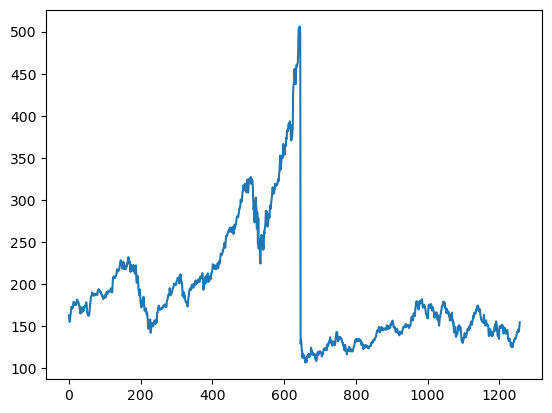

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
#Since LSTM  are sensitive to the scale of the data,so we apply MinMax Scaler

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[0.14073889],
       [0.1319975 ],
       [0.12100188],
       ...,
       [0.09665623],
       [0.11015654],
       [0.11937383]])

In [15]:
df1.shape

(1258, 1)

In [18]:
#splitting the dataset in train and test.
training_size=int(len(df1)*0.65) #taking 65% data for training
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(817, 441)

In [33]:
#convert an arrray of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    x,y=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0] #fortimestamp=100 and i=1, x=0,1,2,3---99 & y=100
        x.append(a)
        y.append(dataset[i+time_step,0])
        
    return np.array(x),np.array(y)

In [34]:
#reshaping into x=t,t+1,t+2,t+3 and y=t+4
time_step=100
X_train,Y_train=create_dataset(train_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)

In [36]:
print(X_train)

[[0.14073889 0.1319975  0.12100188 ... 0.19433939 0.19366312 0.19701941]
 [0.1319975  0.12100188 0.1241578  ... 0.19366312 0.19701941 0.19604258]
 [0.12100188 0.1241578  0.13993738 ... 0.19701941 0.19604258 0.2012273 ]
 ...
 [0.03859737 0.04235441 0.04393237 ... 0.06900438 0.06697558 0.06672511]
 [0.04235441 0.04393237 0.03742016 ... 0.06697558 0.06672511 0.06166562]
 [0.04393237 0.03742016 0.04107702 ... 0.06672511 0.06166562 0.0643707 ]]


In [39]:
print(X_test.shape),print(Y_test.shape)

(340, 100)
(340,)


(None, None)

In [42]:
#reshape input to be {samples, time_steps, features} which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [43]:
##Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [44]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #adding 50 hidden layers
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='Adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0014 - val_loss: 1.9821e-04
Epoch 2/100
12/12 [==============================] - 2s 151ms/step - loss: 0.0013 - val_loss: 1.9206e-04
Epoch 3/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0012 - val_loss: 1.8573e-04
Epoch 4/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0011 - val_loss: 1.7606e-04
Epoch 5/100
12/12 [==============================] - 3s 240ms/step - loss: 9.1082e-04 - val_loss: 1.7873e-04
Epoch 6/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0011 - val_loss: 1.8527e-04
Epoch 7/100
12/12 [==============================] - 3s 217ms/step - loss: 8.8174e-04 - val_loss: 1.8009e-04
Epoch 8/100
12/12 [==============================] - 2s 211ms/step - loss: 0.0012 - val_loss: 1.8583e-04
Epoch 9/100
12/12 [==============================] - 3s 301ms/step - loss: 0.0015 - val_loss: 1.8309e-04
Epoch 10/100
12/12 [===========================

In [47]:
import tensorflow as tf

# prediction and performance metrics

In [48]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 20ms/step


In [49]:
#Transforming back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [51]:
##calculating thr RMSE performance metrics for train data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

230.6678454081299

In [52]:
#RMSE performance for test data
math.sqrt(mean_squared_error(Y_test,test_predict))

155.19484403166487

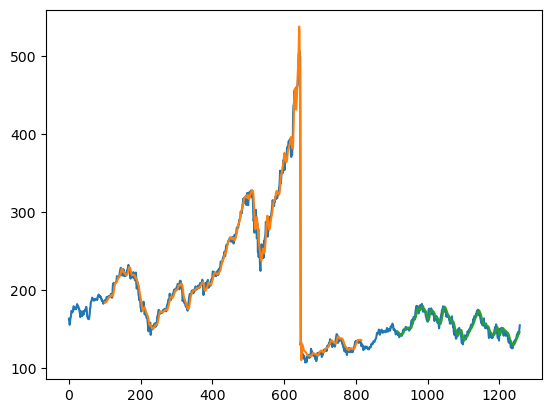

In [55]:
#Plotting
#shifting the train predictions for plotting
look_back=100
train_predict_plot=np.empty_like(df1)
train_predict_plot[:, :]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :]=train_predict

#shifting the test predictions for plotting
test_predict_plot=np.empty_like(df1)
test_predict_plot[:, :]=np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1: len(df1)-1, :]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [59]:
len(test_data)

441

In [58]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [60]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.1177207263619286,
 0.12140262993112083,
 0.11403882279273636,
 0.10985597996242946,
 0.11932373199749524,
 0.1253850970569818,
 0.1174201628052598,
 0.11496556042579836,
 0.10917971195992482,
 0.11003130870381966,
 0.11251095804633682,
 0.10770194113963677,
 0.08926737633061982,
 0.07854727614276763,
 0.08919223544145266,
 0.09833437695679392,
 0.09908578584846583,
 0.09665623043206006,
 0.08328115216030052,
 0.08410770194113959,
 0.08050093926111451,
 0.07889793362554787,
 0.09054477144646211,
 0.07899812147777074,
 0.08909204758922978,
 0.0924483406386975,
 0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,
 0.11396368190356915,
 0.10647463994990602,
 0.09507827175954914,
 0.1224796493425172,
 0.11646837820914213,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.1082028804007513

In [62]:
#prediction for next 30 days
from numpy import array

list_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #printing temp_input
        x_input=np.array(temp_input[1:])
        print("{} Day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        #printing x_input
        q=model.predict(x_input,verbose=0)
        print("{} Day output {}".format(i,q))
        temp_input.extend(q[0].tolist())
        temp_input=temp_input[1:]
        #print temp_input
        list_output.extend(q.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1, n_steps,1))
        q=model.predict(x_input,verbose=0)
        print(q[0])
        temp_input.extend(q[0].tolist())
        print(len(temp_input))
        list_output.extend(q.tolist())
        i=i+1
print(list_output)

0 Day input [0.12140263 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016
 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738
 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115
 0.0841077  0.08050094 0.07889793 0.09054477 0.07899812 0.08909205
 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368
 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435
 0.08025047 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299
 0.10735128 0.10379461 0.10820288 0.10507201 0.10990607 0.11133375
 0.10311835 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622
 0.10316844 0.10386976 0.10261741 0.09966187 0.0903444  0.08541014
 0.08969317 0.08846587 0.09430182 0.09675642 0.0910958  0.07428929
 0.06930495 0.0639449  0.06376957 0.07165936 0.06359424 0.0626675
 0.05808391 0.04809017 0.05703193 0.05783344 0.04566061 0.04889167
 0.04553538 0.05705698 0.05838447 0.05983719 0.06675016 0.06654978
 0.06993112 0.07288666 0.07105823 0.07120852 0.0777

In [63]:
new_days=np.arange(1,101)
day_pred=np.arange(101,131)

In [64]:
import matplotlib.pyplot as plt

In [65]:
df3=df1.tolist()
df3.extend(list_output)

In [66]:
len(df1)

1258

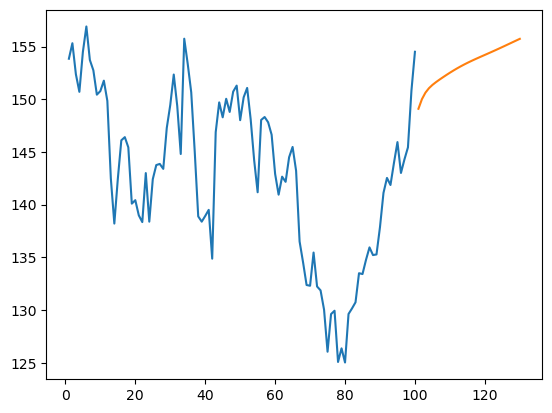

In [67]:
plt.plot(new_days,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(list_output))

In [69]:
#we can still improve this by using bi-directional LSTM
#WILL PERFORM THAT LATER